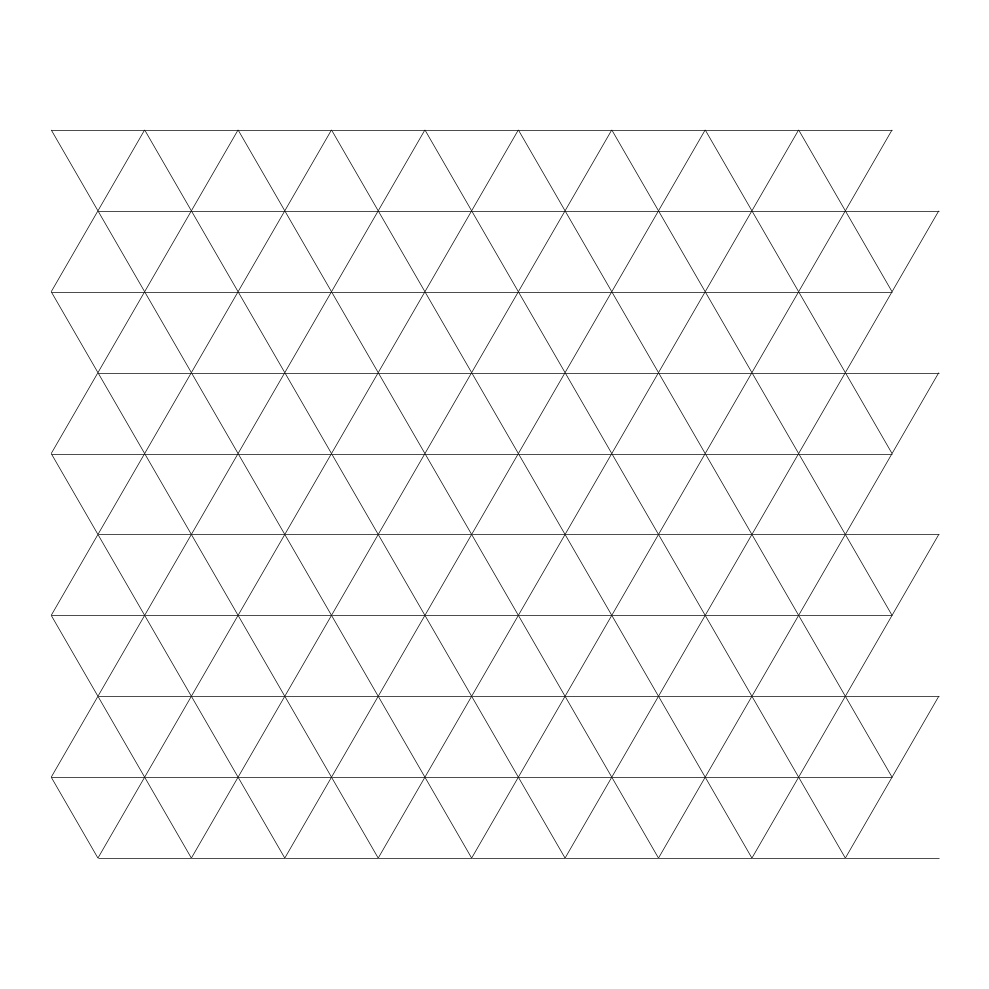

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def create_triangular_lattice(nx, ny, a=1):
    # Create a rectangular grid
    x = np.array([[i for i in range(nx)] for _ in range(ny)], dtype=float)
    y = np.array([[j for _ in range(nx)] for j in range(ny)], dtype=float)
    
    # Shift even rows
    x[::2] += 0.5
    
    # Scale to get equilateral triangles
    x *= a
    y *= a * np.sqrt(3) / 2
    
    return x.flatten(), y.flatten()

def create_lattice_lines(x, y, nx, ny):
    lines = []
    for i in range(ny):
        for j in range(nx):
            idx = i * nx + j
            # Horizontal lines
            if j < nx - 1:
                lines.append([(x[idx], y[idx]), (x[idx+1], y[idx+1])])
            # Diagonal lines
            if i < ny - 1:
                if i % 2 == 0:  # Even rows
                    if j < nx - 1:
                        lines.append([(x[idx], y[idx]), (x[idx+nx], y[idx+nx])])
                        lines.append([(x[idx], y[idx]), (x[idx+nx+1], y[idx+nx+1])])
                else:  # Odd rows
                    lines.append([(x[idx], y[idx]), (x[idx+nx], y[idx+nx])])
                    if j > 0:
                        lines.append([(x[idx], y[idx]), (x[idx+nx-1], y[idx+nx-1])])
    return lines

# Set up the lattice
nx, ny = 10, 10  # Number of points in x and y directions
a = 1  # Lattice constant

# Create the lattice points
x, y = create_triangular_lattice(nx, ny, a)

# Create the lines
lines = create_lattice_lines(x, y, nx, ny)

# Plot the lattice
plt.figure(figsize=(10, 10))
lc = LineCollection(lines, linewidths=.5, colors='black')
plt.gca().add_collection(lc)
# plt.title('Regular Triangular Lattice')
plt.axis('equal')
plt.axis('off')  # Turn off the axis
plt.tight_layout()
plt.show()